In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy,binary_crossentropy,mean_squared_error #카테고리-다중분류  바이너리-이진분류 mse -회귀
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from keras.utils.np_utils import to_categorical 

In [2]:
(X_data,y_data),(tt_x,tt_y)=keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_data.dtype # 숫자가 아니다

dtype('uint8')

In [ ]:
np.unique(y_data), np.unique(tt_y)      #아웃풋 값이 10종류다

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
np.unique(y_data), np.unique(tt_y)      #아웃풋 값이 10종류다


#정규화
s_X_data = X_data.reshape(-1,28,28,1).astype(float)/255.0
s_tt_x = tt_x.reshape(-1,28,28,1).astype(float)/255.0

#카테고리컬- 와이값을 원핫인코딩함 -   유니크상 값10개라 세번째가 0 > 10으로바뀜  # 아웃풋을 10개로 변경했다 아웃풋 시리즈가10개로늘어낫다  값은 0과1 원핫인코딩
y_data = to_categorical(y_data)
tt_y = to_categorical(tt_y)

#데이터차원화인
s_X_data.shape,y_data.shape,s_tt_x.shape,tt_y.shape


((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [ ]:
t_x,v_x,t_y,v_y = train_test_split ( s_X_data, y_data, random_state=42, test_size=0.2)
#스플릿
t_x.shape, v_x.shape, t_y.shape, v_y.shape,        s_tt_x.shape, tt_y.shape
#트레인      벨리데이션                           테스트                 

((48000, 28, 28, 1),
 (12000, 28, 28, 1),
 (48000, 10),
 (12000, 10),
 (10000, 28, 28, 1),
 (10000, 10))

In [ ]:
#모델변수선언
from tensorflow.keras import Sequential
m=Sequential()

In [ ]:
#모델 컨볼루션 n 풀링 조정
m.add(Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1))) #높이,너비,채널 정보를줘야함  채널( 흑백=1, 색상RGB=3) 흑백은일차원 색상은삼차원 
m.add(MaxPooling2D(2)) #풀링층을 무조건 써야하는 건 아니다
m.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
m.add(MaxPooling2D(2))

In [ ]:
#모델 컨볼루션 n 풀링 조정
m.add(Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1))) # 이미지 
m.add(MaxPooling2D(2)) # 이미지 
m.add(Conv2D(64,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1))) # 이미지 
m.add(MaxPooling2D(2)) # 이미지 
m.add(Conv2D(12,kernel_size=(3,3),activation='relu',padding='same')) # 이미지  #  사이즈3이랑 3,3이랑 별 차이가 없다 
#12: 장 수 
m.add(MaxPooling2D(2))  # 이미지 
#컨볼층을 늘릴 수도 있다. 컨볼의 목적은 좋은 픽처를 뽑아내는 것   풀링의 목적은 사이즈 줄이기 

#위는 컨볼루션 층 아래는 뉴런층      /        컨볼루션층 자체도 뉴런네트워크다 즉 아래 덴스층이 없어도 된다 > 플래튼아래 바로 덴스10 으로

m.add(Flatten) #한줄로변경  #이미지를 값으로 할 수 있게 평탄화하는 작업 
m.add(Dense(100,activation='relu')) #값 숫자
m.add(Dropout(0.3)) #값 숫자
m.add(Dense(10,activation='softmax')) # (숫자) > 아웃풋 > 숫자
m.summary()




ValueError: ignored

In [ ]:
#모델 컨볼루션 n 풀링 조정
m.add(Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1))) # 이미지 
m.add(MaxPooling2D(2)) # 이미지 
m.add(Conv2D(64,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1))) # 이미지 
m.add(MaxPooling2D(2)) # 이미지 
m.add(Conv2D(12,kernel_size=(3,3),activation='relu',padding='same')) # 이미지  #  사이즈3이랑 3,3이랑 별 차이가 없다 
#12: 장 수 
m.add(MaxPooling2D(2))  # 이미지 
# 컨볼루션층 자체도 뉴런네트워크다 즉 아래 덴스층이 없어도 된다 > 플래튼아래 바로 덴스10 으로

m.add(Flatten) #한줄로변경  #이미지를 값으로 할 수 있게 평탄화하는 작업 
m.add(Dense(10,activation='softmax')) # (플래튼이미지) > 아웃풋 > 숫자
m.summary()




In [ ]:
# 모델 퍼셉트론 조정
m.add(Flatten())
m.add(Dense(100,activation='relu')) #100은뉴런(노드,단층퍼셉)
m.add(Dropout(0.3))
m.add(Dense(10,activation='softmax'))
m.summary()

In [ ]:
keras.utils.plot_model(m,show_shapes=True)
#모델 구조 시각화

In [ ]:
# 모델 컴파일(학습방법지정), 모델 피팅(학습시작)
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy') #카테고리-분류 , 옵티마이저-최적화함수  #t숫자로받을거냐카테로받을거냐
ck_p = ModelCheckpoint('best_m.h5')  #젤좋은것만기억하고잇겟다
es = EarlyStopping(patience=2,restore_best_weights=True) #얼리스탑  로스는줄어야하는데 2번연속 안줄어들면 스탑한다 보통 2~4로 준다
hy=m.fit( t_x, t_y,    validation_data=(v_x,v_y),      callbacks=[ck_p,es],  epochs=100    )

In [ ]:
plt.plot(hy.history['loss'])     #트레인/벨리데이션셋 로스 히스토리 시각화
plt.plot(hy.history['val_loss'])

In [ ]:
m.evaluate(X_data,y_data)
# 학습시킨 model에 대해 x_data와 y_data를 넣어 얼마나 학습이 잘되었나 검토해보는 코드로, 대부분 100%에 근접하게 나옵니다.(모델이 잘못되지 않은 이상)

In [ ]:
m.evaluate(v_x,v_y)

In [ ]:
m.evaluate(tt_x,tt_y)

In [ ]:
plt.imshow(X_data[4], cmap='gray_r')  

In [ ]:
m.predict((X_data[:4].reshape(-1,28,28,1))/255.0)>0.5

In [ ]:
def c_정답확인(x):
  정답=np.array(['티셔츠', '바지', '스웨터', '드레스', '코트','샌달', '셔츠', '스니커즈', '가방', '앵클 부츠'])
  for d in x:
    ck=np.array([d])
    print(정답[(m.predict(ck)>0.5)[0]])
    plt.imshow(d, cmap='gray_r')
    plt.show()

In [ ]:
c_정답확인(X_data[:4])

In [4]:


#텐서모음
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD , RMSprop, Adam 
from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy,binary_crossentropy,mean_squared_error #카테고리-다중분류  바이너리-이진분류 mse -회귀
                                                                    #로스,오차 얼만큼 틀렸는지 알려주는 함수 : 어느정도틀어야하는지 알려줌
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten  #입력층 -  뉴런화시킨다 픽처사이즈로 키워준다  벡터사이즈로 안바꿔도 자동으로 바뀐다
from tensorflow.keras.layers import Dropout , Conv2D, MaxPooling2D 
from tensorflow.keras.models import load_model , Model #모델을 가지고 온다 > 로드로 불러온 모델은 weight까지 포함되어 있다
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping #얼리스탑 :에서 주는 조건: 연속으로 ..
#(from tensorflow.keras.datasets import boston_housing #보스턴데이터 회귀문제)
from keras.utils.np_utils import to_categorical  # 아웃풋을 원핫인코딩한다  아웃풋이 여러종일 때 아웃풋을 0과1로 전환  

#


In [5]:
from keras.datasets import cifar10


In [6]:
(X_data, y_data) , (tt_x , tt_y) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [7]:
X_data.shape, y_data.shape, tt_x.shape, tt_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [8]:
import numpy as np

In [9]:
np.unique(y_data), np.unique(tt_y)      #아웃풋 값이 10종류다



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
#에스타입

In [10]:
s_X_data = X_data.reshape(-1,32,32,3).astype(float)/255.0  # 나누기 255하면 자동으로 '연산후'플롯으로 바뀌지만 astype플롯으로 먼저 바꿔야 로스가 안생긴다
s_tt_x = tt_x.reshape(-1,32,32,3).astype(float)/255.0        # 아웃풋은 원핫하면 자동으로 플롯으로 바뀐다    
                                                     # 인풋과 아웃풋의 자료형을 플롯,플롯 맞춰주는 것이다
#플롯아닌 실수타입도연산이되지만 로스가 생기는 경우가 있다.

In [ ]:
# 필요 없음
# yy_data = y_data.astype(float) 
# ttt_y = tt_y.astype(float)          

In [14]:
y_data.shape, tt_y.shape

((50000, 1), (10000, 1))

In [16]:
np.unique(y_data), np.unique(tt_y)      #아웃풋 값이 10종류다



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
#차원벗기기

In [18]:
# 필요없음 원핫하면 어짜피 숫자로 바뀜
# yyy_data = np.array(yy_data).flatten()
#  tttt_y = np.array(ttt_y).flatten()

y_data.shape, tt_y.shape

((50000, 1), (10000, 1))

In [19]:
s_X_data.shape, s_tt_x.shape,    y_data.shape, tt_y.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [20]:

#정규화
#s_X_data = X_data.reshape(-1,32,32,3).astype(float)/255.0
#s_tt_x = tt_x.reshape(-1,32,32,3).astype(float)/255.0

#카테고리컬- 와이값을 원핫인코딩함 -   유니크상 값10개라 세번째가 0 > 10으로바뀜  # 아웃풋을 10개로 변경했다 아웃풋 시리즈가10개로늘어낫다  값은 0과1 원핫인코딩
y_data = to_categorical(y_data)
tt_y = to_categorical(tt_y)

#데이터차원화인
#s_X_data.shape,yy_data.shape,s_tt_x.shape,tttt_y.shape
s_X_data.shape, s_tt_x.shape,    y_data.shape, tt_y.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [39]:
type(tt_y)

numpy.ndarray

In [ ]:
#시엔엔기반의 학습 정답을 원핫인코딩 방식으로 정리하여 모델을 학습하고 결과를 확인하시오


In [21]:
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y=train_test_split(s_X_data,y_data,random_state=42,test_size=0.2)
t_x.shape, v_x.shape, t_y.shape, v_y.shape,            s_tt_x.shape,tt_y.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 32, 32, 3),
 (10000, 10))

In [40]:
m = Sequential()

In [41]:
m.add(Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(32,32,3)))
m.add(MaxPooling2D(2))
m.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))   # 세임 페딩이라 안줄어듬
m.add(MaxPooling2D(2))
m.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
m.add(MaxPooling2D(2))

In [ ]:
m.add(Flatten())   #이미지를 받았기 때문에 한줄로 펼치기 위해 플래튼을 꼭 써야한다
m.add(Dense(100,activation='relu'))                 #덴스영역은 픽셀마다 웨이트값적용
m.add(Dense(10,activation='softmax'))                 #컨볼루션영역은 이미지로 한번에 덴스는 값으로 여러개로
# 원핫을 해도 와이값 10개 받기 때문에 이진분류가 아니다> 시그모이드x > 소프트맥스 
 # 시그모이드:이진.다중레이블  소프트맥스:다중클래스
m.summary()

In [27]:
t_x.shape, v_x.shape, t_y.shape, v_y.shape,            s_tt_x.shape,tt_y.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 32, 32, 3),
 (10000, 10))

In [43]:
import pandas as pd
pd.DataFrame(v_y)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')  #카테고리를 바꿨으면(원핫-카테) loss='categorical_crossentropy가 필수
ck_p=ModelCheckpoint('best_m.h5')  #젤좋은것만기억하고잇겟다  베스트모델을 체크포인트로 기억하고 잇다
es=EarlyStopping(patience=2,restore_best_weights=True)   #얼리스탑  로스는줄어야하는데 2번연속 안줄어들면 스탑한다 보통 2~4로 준다
                                                            # 벨리데이션 로스 기준이다!
hy=m.fit(t_x,t_y,validation_data=(v_x,v_y),callbacks=[ck_p,es],epochs=10)


Epoch 1/10
1250/1250 [==============================] - 96s 77ms/step - loss: 1.4880 - accuracy: 0.4575 - val_loss: 1.2182 - val_accuracy: 0.5604
Epoch 2/10
1250/1250 [==============================] - 89s 71ms/step - loss: 1.0833 - accuracy: 0.6174 - val_loss: 0.9917 - val_accuracy: 0.6483
Epoch 3/10
1250/1250 [==============================] - 101s 80ms/step - loss: 0.9160 - accuracy: 0.6781 - val_loss: 0.9188 - val_accuracy: 0.6799
Epoch 4/10
1250/1250 [==============================] - 95s 76ms/step - loss: 0.8084 - accuracy: 0.7175 - val_loss: 0.8494 - val_accuracy: 0.7071
Epoch 5/10
1250/1250 [==============================] - 88s 70ms/step - loss: 0.7344 - accuracy: 0.7447 - val_loss: 0.8282 - val_accuracy: 0.7162
Epoch 6/10
1250/1250 [==============================] - 88s 70ms/step - loss: 0.6645 - accuracy: 0.7674 - val_loss: 0.8504 - val_accuracy: 0.7130
Epoch 7/10
1250/1250 [==============================] - 92s 73ms/step - loss: 0.6052 - accuracy: 0.7881 - val_loss: 0.8474 

In [50]:
hy=m.fit(t_x,t_y,validation_data=(v_x,v_y),callbacks=[ck_p,es],epochs=3)
#기존 학습을 유지하고 추가 에폭을 실행할 수 있다.

Epoch 1/3
1250/1250 [==============================] - 88s 71ms/step - loss: 0.6591 - accuracy: 0.7697 - val_loss: 0.8544 - val_accuracy: 0.7096
Epoch 2/3
1250/1250 [==============================] - 88s 70ms/step - loss: 0.6023 - accuracy: 0.7905 - val_loss: 0.8439 - val_accuracy: 0.7163
Epoch 3/3
1250/1250 [==============================] - 88s 70ms/step - loss: 0.5511 - accuracy: 0.8093 - val_loss: 0.8371 - val_accuracy: 0.7276


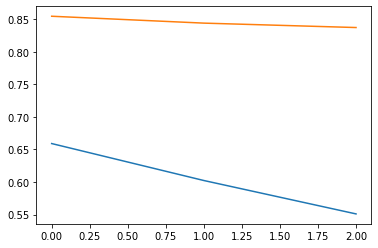

In [51]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [46]:
t_x.shape, v_x.shape, t_y.shape, v_y.shape,            s_tt_x.shape,tt_y.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 32, 32, 3),
 (10000, 10))

In [47]:
m.evaluate(t_x,t_y)

1250/1250 [==============================] - 25s 20ms/step - loss: 0.6319 - accuracy: 0.7819


[0.6319335699081421, 0.7819499969482422]

In [48]:
m.evaluate(v_x,v_y)

313/313 [==============================] - 6s 19ms/step - loss: 0.8282 - accuracy: 0.7162


[0.8281799554824829, 0.7161999940872192]

In [49]:
m.evaluate(s_tt_x,tt_y)

313/313 [==============================] - 6s 19ms/step - loss: 0.8321 - accuracy: 0.7126


[0.8320986032485962, 0.7125999927520752]